In [1]:
# G2M Insights code for DG Virtual internship
# Omar R.A. Ammar
# important imports
 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import calendar

plt.rcParams["figure.figsize"] = (15,10)

In [2]:
def readFiles(folder_name):
    
    CabData = pd.read_csv(folder_name + '/Cab_Data.csv')
    CityData = pd.read_csv(folder_name + '/City.csv')
    CustomerData = pd.read_csv(folder_name + '/Customer_ID.csv')
    TransactionData = pd.read_csv(folder_name + '/Transaction_ID.csv')
    
    return CabData, CityData , CustomerData, TransactionData
    

In [3]:
def cleanData(Dataset):
    Dataset.dropna(inplace = True) # remove all the null data
    Dataset.drop_duplicates(inplace = True) # remove all the duplicated data
    

In [4]:

# get all the data in csv files
CabData , CityData, CustomerData , TransactionData = readFiles('/Users/omarammar/PycharmProjects/G2M-insight-Data-Analysis')

# clean the Data
cleanData(CabData)
cleanData(CityData)
cleanData(CustomerData)
cleanData(TransactionData)



# show some of the data as example to it being loaded correctly


In [5]:
print(CabData.head(10))


   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   
5        10000016           42376  Pink Cab  ATLANTA GA          6.06   
6        10000017           42372  Pink Cab   AUSTIN TX         44.00   
7        10000018           42376  Pink Cab   AUSTIN TX         35.65   
8        10000019           42381  Pink Cab   BOSTON MA         14.40   
9        10000020           42375  Pink Cab   BOSTON MA         10.89   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776 

In [6]:
rows_count = len(CabData.index) + len(CityData.index) + len(CustomerData) + len(TransactionData)
print('Number of rows in the Cab dataset : ' + str(len(CabData.index)))
print('Number of rows in the City dataset : ' + str(len(CityData.index)))
print('Number of rows in the Customer dataset : ' + str(len(CustomerData)))
print('Number of rows in the Transaction dataset : ' + str(len(TransactionData)))
print('Number of rows in the whole dataset : ' + str(rows_count))

print('-'*80)
coloumn_count = CabData.shape[1] + CityData.shape[1] + CustomerData.shape[1] + TransactionData.shape[1]

print('Number of coloumns in the Cab dataset: ' + str(CabData.shape[1]))
print('Number of coloumns in the Cab dataset: ' + str(CityData.shape[1]))
print('Number of coloumns in the Cab dataset: ' + str(CustomerData.shape[1]))
print('Number of coloumns in the Cab dataset: ' + str(TransactionData.shape[1]))
print('Number of coloumns in the whole dataset : ' + str(coloumn_count))



Number of rows in the Cab dataset : 359392
Number of rows in the City dataset : 20
Number of rows in the Customer dataset : 49171
Number of rows in the Transaction dataset : 440098
Number of rows in the whole dataset : 848681
--------------------------------------------------------------------------------
Number of coloumns in the Cab dataset: 7
Number of coloumns in the Cab dataset: 3
Number of coloumns in the Cab dataset: 4
Number of coloumns in the Cab dataset: 3
Number of coloumns in the whole dataset : 17


In [7]:
# Changing all the time stamps to date format
def dateFixer(timestamp):
    orgDate = dt.datetime(1900, 1, 1)
    return orgDate + dt.timedelta(days = timestamp)
    
    
CabData['Date of Travel'] = CabData.apply(lambda row : dateFixer(row['Date of Travel']),axis = 1)

In [8]:
# '''
# The first Hypothesis:
#     Is there any seasonality in number of customers(number of rides) using the cab service? .
#     Steps: 
#         First we have to seperate the Cab dataset into the months , and then seperate it again according to the 2 
#         Cab companies to compare.
# '''

In [9]:
# prepare the data
months = ['Dummy' ,'January', 'Feburary' , 'March' , 'April' , 'May', 'June' , 'July' , 'August', 'September' , 'November' , 'December']
season1 = {}
season2 = {}
season3 = {}

for month in months:
    season1[month] = 0
    season2[month] = 0
    season3[month] = 0
    
print(CabData.head(10))

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-10  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-08  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-04  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-09  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-05  Pink Cab  ATLANTA GA          8.73   
5        10000016     2016-01-09  Pink Cab  ATLANTA GA          6.06   
6        10000017     2016-01-05  Pink Cab   AUSTIN TX         44.00   
7        10000018     2016-01-09  Pink Cab   AUSTIN TX         35.65   
8        10000019     2016-01-14  Pink Cab   BOSTON MA         14.40   
9        10000020     2016-01-08  Pink Cab   BOSTON MA         10.89   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
5        

In [10]:
for i in range(1,len(months)):
    season1[months[i]] = CabData[(pd.to_datetime(CabData['Date of Travel']).dt.month == i) & (pd.to_datetime(CabData['Date of Travel']).dt.year == 2016 )]
    season1[months[i]] = season1[months[i]]['Date of Travel'].count()
    season2[months[i]] = CabData[(pd.to_datetime(CabData['Date of Travel']).dt.month == i) & (pd.to_datetime(CabData['Date of Travel']).dt.year == 2017)]
    season2[months[i]] = season2[months[i]]['Date of Travel'].count()
    season3[months[i]] = CabData[(pd.to_datetime(CabData['Date of Travel']).dt.month == i) & (pd.to_datetime(CabData['Date of Travel']).dt.year == 2018)]
    season3[months[i]] = season3[months[i]]['Date of Travel'].count()
    
season1.pop('Dummy')
season2.pop('Dummy')
season3.pop('Dummy')


0

In [11]:
print(season1)
print(season2)
print(season3)

{'January': 4017, 'Feburary': 5881, 'March': 6594, 'April': 6230, 'May': 7863, 'June': 7325, 'July': 8247, 'August': 9844, 'September': 10821, 'November': 12644, 'December': 13008}
{'January': 9050, 'Feburary': 6499, 'March': 7220, 'April': 7981, 'May': 8606, 'June': 8108, 'July': 9834, 'August': 11576, 'September': 12655, 'November': 15358, 'December': 14972}
{'January': 11173, 'Feburary': 6012, 'March': 6886, 'April': 7610, 'May': 7836, 'June': 7849, 'July': 9717, 'August': 10269, 'September': 12356, 'November': 13717, 'December': 14385}


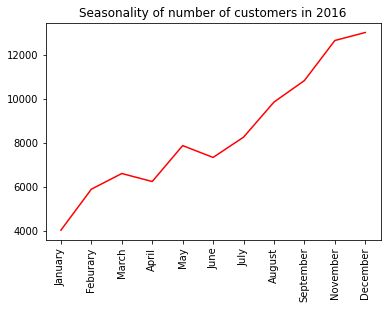

In [12]:
# plotting the bar graph
names = list(season1.keys())
values = list(season1.values())

X_axis = np.arange(len(season1))

plt.plot(names,values,color='red')
plt.title('Seasonality of number of customers in 2016')


plt.xticks(rotation = 'vertical')
plt.show()

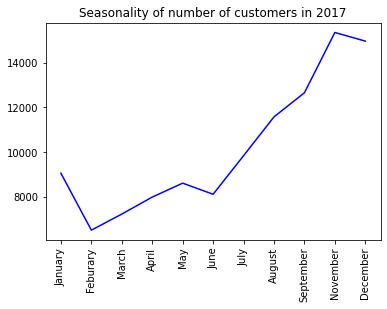

In [13]:
# plotting the bar graph
names = list(season2.keys())
values = list(season2.values())

X_axis = np.arange(len(season1))

plt.plot(names,values,color='blue')
plt.title('Seasonality of number of customers in 2017')



plt.xticks(rotation = 'vertical')
plt.show()

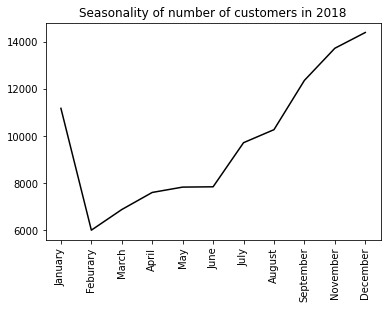

In [14]:
# plotting the bar graph
names = list(season3.keys())
values = list(season3.values())

X_axis = np.arange(len(season1))

plt.plot(names,values,color='black')
plt.title('Seasonality of number of customers in 2018')

plt.xticks(rotation = 'vertical')
plt.show()

In [15]:
'''
    From analyzing the seasonality of customers: towards 2017 and 2018 there was a sharp increase in customers requesting taxis 
    in januaray .overall the demand increases towards winter months and decreases towards spring months. the cycle repeats
    every year.
'''

'\n    From analyzing the seasonality of customers: towards 2017 and 2018 there was a sharp increase in customers requesting taxis \n    in januaray .overall the demand increases towards winter months and decreases towards spring months. the cycle repeats\n    every year.\n'

In [16]:
# '''
# The Second Hypothesis: 
#     Day wise analysis
    
# '''

In [17]:
def dayer(date):
    return calendar.day_name[date.weekday()]

In [18]:
Days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

pinkTrends = {}
YellowTrends = {}

for day in Days:
    pinkTrends[day] = 0
    YellowTrends[day] = 0

In [19]:
# extract the weekdays and add it to the dataframe
CabData['Day'] = CabData.apply(lambda row : dayer(row['Date of Travel']),axis = 1)

YellowCabRides = CabData[CabData['Company'] == 'Yellow Cab']
PinkCabRides = CabData[CabData['Company'] == 'Pink Cab']

In [20]:

for day in Days:
    temp = YellowCabRides[YellowCabRides['Day'] == day]
    YellowTrends[day] = temp['Day'].count()

    temp = PinkCabRides[PinkCabRides['Day'] == day]
    pinkTrends[day] = temp['Day'].count()



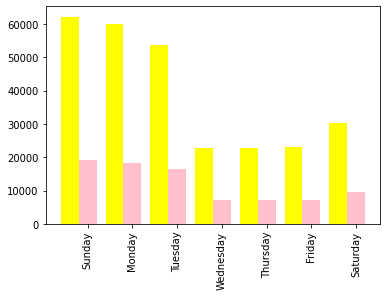

In [21]:
# plotting the bar graph
names = list(Days)
Cvalues = list(YellowTrends.values())
Pvalues = list(pinkTrends.values())

X_axis = np.arange(len(Cvalues))

plt.bar(X_axis-0.2, Cvalues,0.4, tick_label=names,color='yellow')
plt.bar(X_axis+0.2, Pvalues,0.4, tick_label=names,color='pink')


plt.xticks(rotation = 'vertical')
plt.show()

In [22]:
'''
    We can clearly see that the demand for taxis increases in the first days of the week and is less in other days. overall 
    the yellow cab provided way more trips than the pink cab on daily basis.
'''

'\n    We can clearly see that the demand for taxis increases in the first days of the week and is less in other days. overall \n    the yellow cab provided way more trips than the pink cab on daily basis.\n'

In [23]:
# '''
#     The Third Hypothesis:
#     Which company provides a wider range of service? 
    
#     Steps:
#          First seperate the datasets according to the cities and then count how many times did a certain company 
#          provide service to a certain city.
# '''

In [24]:
# These two dictionaries will keep the data of each city and how many rides did it provide 
PinkCab = {}
YellowCab = {}

YellowCabRides = CabData[CabData['Company'] == 'Yellow Cab']
PinkCabRides = CabData[CabData['Company'] == 'Pink Cab']

Cities = np.unique(YellowCabRides['City'].values)

for city in Cities:
    PinkCab[city] = 0
    YellowCab[city]=0
    


In [25]:
# instead of looping we are going to use index
for city in Cities:
    YellowCab[city] = len(YellowCabRides[YellowCabRides['City'] == city].index)
    PinkCab[city] = len(PinkCabRides[PinkCabRides['City'] == city].index)

In [26]:
print(YellowCab)

{'ATLANTA GA': 5795, 'AUSTIN TX': 3028, 'BOSTON MA': 24506, 'CHICAGO IL': 47264, 'DALLAS TX': 5637, 'DENVER CO': 2431, 'LOS ANGELES CA': 28168, 'MIAMI FL': 4452, 'NASHVILLE TN': 1169, 'NEW YORK NY': 85918, 'ORANGE COUNTY': 2469, 'PHOENIX AZ': 1200, 'PITTSBURGH PA': 631, 'SACRAMENTO CA': 1033, 'SAN DIEGO CA': 9816, 'SEATTLE WA': 5265, 'SILICON VALLEY': 4722, 'TUCSON AZ': 1132, 'WASHINGTON DC': 40045}


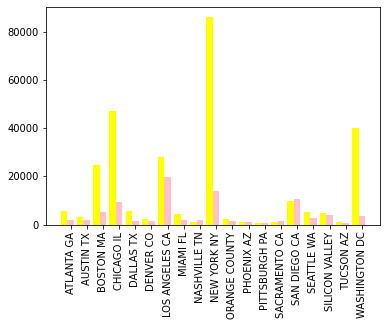

In [27]:
# plotting the bar graph
names = list(YellowCab.keys())
Cvalues = list(YellowCab.values())
Pvalues = list(PinkCab.values())

X_axis = np.arange(len(YellowCab))

plt.bar(X_axis-0.2, Cvalues,0.4, tick_label=names,color='yellow')
plt.bar(X_axis+0.2, Pvalues,0.4, tick_label=names,color='pink')


plt.xticks(rotation = 'vertical')
plt.show()

In [28]:
'''
it is clear fromt the difference that the yellow cab provides more service in busy cities like washington and new york, the 
yellow cab was more requested in every city other than san diego CA, we can deduct that the yellow cab provides more services
and coverage in the cities
'''

'\nit is clear fromt the difference that the yellow cab provides more service in busy cities like washington and new york, the \nyellow cab was more requested in every city other than san diego CA, we can deduct that the yellow cab provides more services\nand coverage in the cities\n'

In [29]:
# '''
#     The Fourth Hypothesis:
#     Is there a seasonality in the profit?
    
#     
# '''

In [30]:
# prepare the data
season = {'Pink Cab' : 0, 'Yellow Cab' : 0 }
YellowCabRides = CabData[CabData['Company'] == 'Yellow Cab']
PinkCabRides = CabData[CabData['Company'] == 'Pink Cab']


season['Pink Cab'] = PinkCabRides['Price Charged'].sum() - PinkCabRides['Cost of Trip'].sum()
season['Yellow Cab'] = YellowCabRides['Price Charged'].sum() - YellowCabRides['Cost of Trip'].sum()



In [31]:
months = ['Dummy' ,'January', 'Feburary' , 'March' , 'April' , 'May', 'June' , 'July' , 'August', 'September' , 'November' , 'December']
season1 = {}
season2 = {}
season3 = {}

for month in months:
    season1[month] = 0
    season2[month] = 0
    season3[month] = 0

In [32]:
for i in range(1,len(months)):
    season1[months[i]] = CabData[(pd.to_datetime(CabData['Date of Travel']).dt.month == i) & (pd.to_datetime(CabData['Date of Travel']).dt.year == 2016 )]
    season1[months[i]] = season1[months[i]]['Price Charged'].sum() - season1[months[i]]['Cost of Trip'].sum()
    
    season2[months[i]] = CabData[(pd.to_datetime(CabData['Date of Travel']).dt.month == i) & (pd.to_datetime(CabData['Date of Travel']).dt.year == 2017)]
    season2[months[i]] = season2[months[i]]['Price Charged'].sum() - season2[months[i]]['Cost of Trip'].sum()
    
    season3[months[i]] = CabData[(pd.to_datetime(CabData['Date of Travel']).dt.month == i) & (pd.to_datetime(CabData['Date of Travel']).dt.year == 2018)]
    season3[months[i]] = season3[months[i]]['Price Charged'].sum() - season3[months[i]]['Cost of Trip'].sum()

season1.pop('Dummy')
season2.pop('Dummy')
season3.pop('Dummy')

0

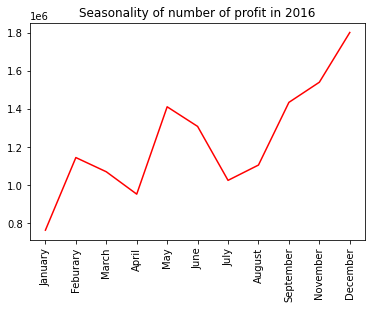

In [33]:
# plotting the bar graph
names = list(season1.keys())
values = list(season1.values())

X_axis = np.arange(len(season1))

plt.plot(names,values,color='red')
plt.title('Seasonality of number of profit in 2016')


plt.xticks(rotation = 'vertical')
plt.show()

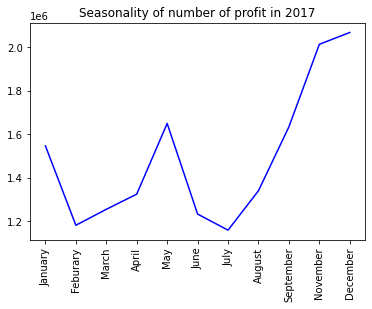

In [34]:
# plotting the bar graph
names = list(season2.keys())
values = list(season2.values())

X_axis = np.arange(len(season1))

plt.plot(names,values,color='blue')
plt.title('Seasonality of number of profit in 2017')



plt.xticks(rotation = 'vertical')
plt.show()

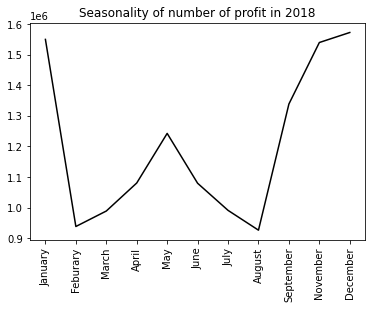

In [35]:
# plotting the bar graph
names = list(season3.keys())
values = list(season3.values())

X_axis = np.arange(len(season1))

plt.plot(names,values,color='black')
plt.title('Seasonality of number of profit in 2018')

plt.xticks(rotation = 'vertical')
plt.show()

In [36]:
'''
    Relating to the seasonality in the number of customers we can see that the profit increases in the start and the end of the 
    year and it takes a similar shape to a W with the increase in may.
'''

'\n    Relating to the seasonality in the number of customers we can see that the profit increases in the start and the end of the \n    year and it takes a similar shape to a W with the increase in may.\n'

In [37]:
# '''
#     The Fifth Hypothesis:
#     Customer analysis on ride distance
    
#     
# '''

In [38]:
#round up to multiple of 5 from both end ( used for approximating the distance)
def rof(x):
    if x%5==4:
        x+=1
    elif x%5==1:
        x-=1
    elif x%5==2:
        x-=2
    elif x%5==3:
        x+=2
    return int(x)

In [39]:
PinkDistances = {}
YellowDistances = {}

PinkEarnings = {}
YellowEarnings = {}

max_distance = rof(CabData['KM Travelled'].max())

for i in range(0,max_distance+5,5):
    PinkDistances[i] =  0
    YellowDistances[i] =  0
    PinkEarnings[i] = 0
    YellowEarnings[i] = 0


In [40]:
print('Total number of trips by Yellow Cab: '+ str(len(YellowCabRides.index)))
print('Total number of trips by Pink Cab: '+ str(len(PinkCabRides.index)))



Total number of trips by Yellow Cab: 274681
Total number of trips by Pink Cab: 84711


In [41]:
TempCabData = CabData

In [42]:
CabData['KM Travelled'] = CabData.apply(lambda row : rof(row['KM Travelled']),axis = 1)
print(CabData.head(10))

YellowCabRides = CabData[CabData['Company'] == 'Yellow Cab']
PinkCabRides = CabData[CabData['Company'] == 'Pink Cab']

CabData = TempCabData

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-10  Pink Cab  ATLANTA GA            30   
1        10000012     2016-01-08  Pink Cab  ATLANTA GA            28   
2        10000013     2016-01-04  Pink Cab  ATLANTA GA             9   
3        10000014     2016-01-09  Pink Cab  ATLANTA GA            33   
4        10000015     2016-01-05  Pink Cab  ATLANTA GA             8   
5        10000016     2016-01-09  Pink Cab  ATLANTA GA             6   
6        10000017     2016-01-05  Pink Cab   AUSTIN TX            45   
7        10000018     2016-01-09  Pink Cab   AUSTIN TX            35   
8        10000019     2016-01-14  Pink Cab   BOSTON MA            14   
9        10000020     2016-01-08  Pink Cab   BOSTON MA            10   

   Price Charged  Cost of Trip       Day  
0         370.95       313.635    Sunday  
1         358.52       334.854    Friday  
2         125.20        97.632    Monday  
3         377.40       351.602  Sat

In [43]:
# calculate the total profit for every KM travelled
for i in range(0,max_distance+5,5):
    Pink = PinkCabRides[PinkCabRides['KM Travelled'] == i]
    Yellow = YellowCabRides[YellowCabRides['KM Travelled'] == i]
    PinkDistances[i] =  len(Pink.index)
    YellowDistances[i] =  len(Yellow.index)
    PinkEarnings[i] += Pink['Price Charged'].sum() - Pink['Cost of Trip'].sum()
    YellowEarnings[i] += Yellow['Price Charged'].sum() - Yellow['Cost of Trip'].sum()

    
# xDistances[i][0] = The number of trips taken , xDistancecs[i][1]
print(YellowDistances)
print(PinkDistances)


{0: 280, 5: 8137, 10: 8182, 15: 7593, 20: 8322, 25: 8884, 30: 7647, 35: 8101, 40: 6337, 45: 2102, 50: 281}
{0: 82, 5: 2510, 10: 2544, 15: 2348, 20: 2662, 25: 2822, 30: 2435, 35: 2492, 40: 1883, 45: 676, 50: 85}


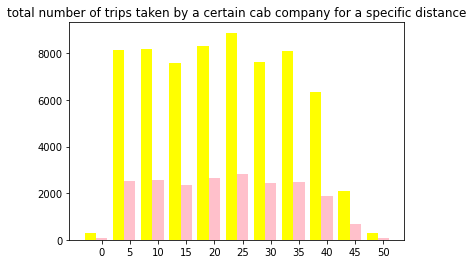

In [44]:
# plotting the bar graph
names = list(YellowDistances.keys())
Cvalues = list(YellowDistances.values())
Pvalues = list(PinkDistances.values())

X_axis = np.arange(len(YellowDistances))

plt.bar(X_axis-0.2, Cvalues,0.4, tick_label=names,color = 'yellow')
plt.bar(X_axis+0.2, Pvalues,0.4, tick_label=names, color = 'pink')

plt.title("total number of trips taken by a certain cab company for a specific distance")
plt.show()

In [45]:
'''
From the graph we can deduce that the yellow cab is more preferred over all the trips distances , providing wider range of service 
explains why for trips 50+ the yellow has a significant difference.
'''

'\nFrom the graph we can deduce that the yellow cab is more preferred over all the trips distances , providing wider range of service \nexplains why for trips 50+ the yellow has a significant difference.\n'

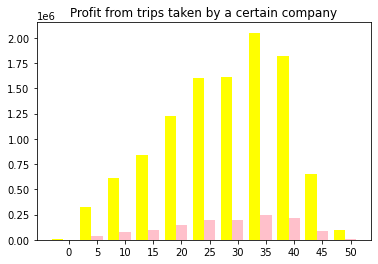

In [46]:
# plotting the bar graph
names = list(YellowEarnings.keys())
Cvalues = list(YellowEarnings.values())
Pvalues = list(PinkEarnings.values())

X_axis = np.arange(len(YellowEarnings))

plt.bar(X_axis-0.2, Cvalues,0.4, tick_label=names,color = 'yellow')
plt.bar(X_axis+0.2, Pvalues,0.4, tick_label=names, color = 'pink')

plt.title("Profit from trips taken by a certain company")
plt.show()

In [47]:
'''
    On the other hand the profit the yellow cab got from the trips was the most at 35 km distance although it wasn't the most 
    requested distance in the previous graph
'''

"\n    On the other hand the profit the yellow cab got from the trips was the most at 35 km distance although it wasn't the most \n    requested distance in the previous graph\n"

In [48]:
# '''
#     The Sixth Hypothesis:
#     Customer Analysis
#     sex, age , income
#     
# '''

In [49]:
# firstly according to sex
CustomerDataMale = CustomerData[CustomerData['Gender']== 'Male']
CustomerDataFemale = CustomerData[CustomerData['Gender']== 'Female']

In [50]:
CountMale = CustomerDataMale['Gender'].count()
CountFemale = CustomerDataFemale['Gender'].count()

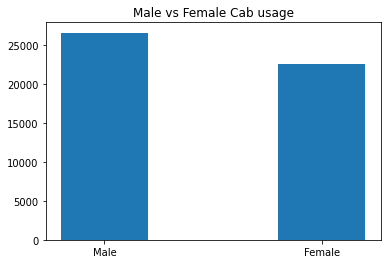

In [51]:
# plotting the bar graph
names = ['Male','Female']
values = [CountMale,CountFemale]

X_axis = np.arange(len(names))

plt.bar(X_axis,values,0.4, tick_label=names)

plt.title("Male vs Female Cab usage")
plt.show()

In [52]:
'''
From analyzing customers data we can see that using Cabs in general is more famous in males than females.

'''

'\nFrom analyzing customers data we can see that using Cabs in general is more famous in males than females.\n\n'

In [53]:
print(CustomerData.head(10))

   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
5        27318   Male   25               13984
6        33788   Male   23               23788
7        34106   Male   19               19980
8        59799   Male   33               19271
9        57982   Male   57                5068


In [54]:
# secondly, according to age
# find the minimum and maximum ages
minAge = CustomerData['Age'].min()
print('The minimum age for customer in platform: ' + str(minAge))

maxAge = CustomerData['Age'].max()
print('The maximum age for customer in platform: ' + str(maxAge))



The minimum age for customer in platform: 18
The maximum age for customer in platform: 65


In [55]:
# lets have 5 age groups
# 18-25 , 25-35, 35-45 , 45 - 55 , 55 +
AgeGroups = ['18-25' , '25-35', '35-45' , '45 - 55' , '55 +']
AgeTrends = {}

for age in AgeGroups:
    AgeTrends[age] = 0




In [56]:
# firstly according to sex
AgeGroup1 = CustomerData[(CustomerData['Age'] >= 18) & (CustomerData['Age'] <= 25)]
AgeGroup2 = CustomerData[(CustomerData['Age'] >= 25) & (CustomerData['Age'] <= 35)]
AgeGroup3 = CustomerData[(CustomerData['Age'] >= 35) & (CustomerData['Age'] <= 45)]
AgeGroup4 = CustomerData[(CustomerData['Age'] >= 45) & (CustomerData['Age'] <= 55)]
AgeGroup5 = CustomerData[(CustomerData['Age'] >= 55)]


In [57]:
AgeTrends[AgeGroups[0]] = AgeGroup1['Age'].count()
AgeTrends[AgeGroups[1]] = AgeGroup2['Age'].count()
AgeTrends[AgeGroups[2]] = AgeGroup3['Age'].count()
AgeTrends[AgeGroups[3]] = AgeGroup4['Age'].count()
AgeTrends[AgeGroups[4]] = AgeGroup5['Age'].count()

In [58]:
print(AgeTrends)

{'18-25': 12662, '25-35': 17178, '35-45': 11933, '45 - 55': 5824, '55 +': 5729}


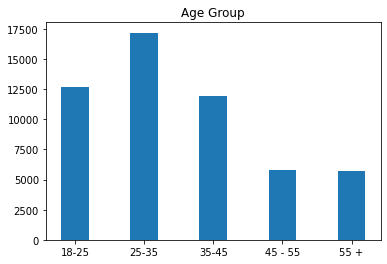

In [59]:
# plotting the bar graph
names = list(AgeTrends.keys())
values = AgeTrends.values()

X_axis = np.arange(len(AgeTrends.keys()))

plt.bar(X_axis,values,0.4, tick_label=names)

plt.title("Age Group")
plt.show()

In [60]:
'''
We can see that the age group that requested the most taxis was between 25-35 years old
'''

'\nWe can see that the age group that requested the most taxis was between 25-35 years old\n'

In [61]:
# Thirdly, According to income
minIncome = CustomerData['Income (USD/Month)'].min()
print('The minimum age for customer in platform: ' + str(minIncome))

maxIncome = CustomerData['Income (USD/Month)'].max()
print('The maximum age for customer in platform: ' + str(maxIncome))

The minimum age for customer in platform: 2000
The maximum age for customer in platform: 35000


In [62]:
# lets have 5 income groups
# 18-25 , 25-35, 35-45 , 45 - 55 , 55 +
IncomeGroups = ['0-10K' , '10K-15K', '15K-20K' , '20K - 25K' , '25K +']
IncomeTrends = {}

for Income in IncomeGroups:
    IncomeTrends[Income] = 0


In [63]:
IncomeGroup1 = CustomerData[(CustomerData['Income (USD/Month)'] <= 10000)]
IncomeGroup2 = CustomerData[(CustomerData['Income (USD/Month)'] > 10000) & (CustomerData['Income (USD/Month)'] <= 15000)]
IncomeGroup3 = CustomerData[(CustomerData['Income (USD/Month)'] > 15000) & (CustomerData['Income (USD/Month)'] <= 20000)]
IncomeGroup4 = CustomerData[(CustomerData['Income (USD/Month)'] > 20000) & (CustomerData['Income (USD/Month)'] <= 25000)]
IncomeGroup5 = CustomerData[(CustomerData['Income (USD/Month)'] > 25000)]


In [64]:
IncomeTrends[IncomeGroups[0]] = IncomeGroup1['Income (USD/Month)'].count()
IncomeTrends[IncomeGroups[1]] = IncomeGroup2['Income (USD/Month)'].count()
IncomeTrends[IncomeGroups[2]] = IncomeGroup3['Income (USD/Month)'].count()
IncomeTrends[IncomeGroups[3]] = IncomeGroup4['Income (USD/Month)'].count()
IncomeTrends[IncomeGroups[4]] = IncomeGroup5['Income (USD/Month)'].count()

In [65]:
print(IncomeTrends)

{'0-10K': 15645, '10K-15K': 9591, '15K-20K': 9650, '20K - 25K': 9769, '25K +': 4516}


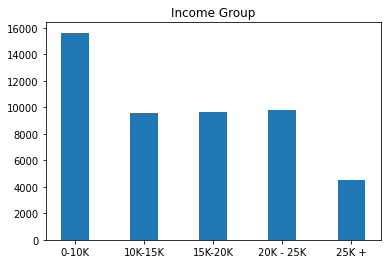

In [66]:
# plotting the bar graph
names = list(IncomeTrends.keys())
values = IncomeTrends.values()

X_axis = np.arange(len(IncomeTrends.keys()))

plt.bar(X_axis,values,0.4, tick_label=names)

plt.title("Income Group")
plt.show()

In [67]:
'''
    Low income citizes are the ones who ordered cabs the most
'''

'\n    Low income citizes are the ones who ordered cabs the most\n'

In [68]:
# Cash vs Card Payment ( Card payment is usually easier and safer)
print(TransactionData.head(10))

   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card
5        10000016        27318         Cash
6        10000017        33788         Card
7        10000018        34106         Card
8        10000019        59799         Cash
9        10000020        57982         Cash


In [69]:
CardPayments = TransactionData[TransactionData['Payment_Mode'] == 'Card']
CashPayments = TransactionData[TransactionData['Payment_Mode'] == 'Cash']


In [70]:
count= {"Card" :CardPayments['Payment_Mode'].count(),"Cash" :CashPayments['Payment_Mode'].count()}
print(count)

{'Card': 263991, 'Cash': 176107}


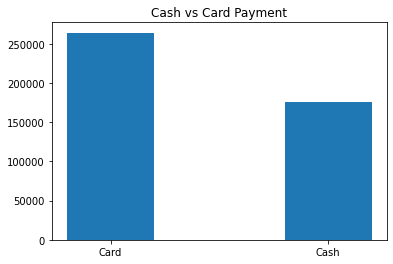

In [71]:
# plotting the bar graph
names = list(count.keys())
values = count.values()

X_axis = np.arange(len(count.keys()))

plt.bar(X_axis,values,0.4, tick_label=names)

plt.title("Cash vs Card Payment")
plt.show()

In [72]:
'''
    Since cards provide a safe option to pay , customers in general prefer paying using CARD rather than cash.
'''

'\n    Since cards provide a safe option to pay , customers in general prefer paying using CARD rather than cash.\n'

In [73]:
'''

    After analying all the results above, the yellow cab has higher reach, more profit and is requested more than the pink cab
    thus I recommand the yellow cab for investment.
'''

'\n\n    After analying all the results above, the yellow cab has higher reach, more profit and is requested more than the pink cab\n    thus I recommand the yellow cab for investment.\n'